In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [21]:
#Assigning new column names
df.columns = ['Regency', 'Frequency', 'Monetary', 'Time', 'Target']
df.head()

,Regency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [22]:
df.isnull().sum()

Regency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [23]:
X = df.drop('Target', axis=1)  #Features
y = df['Target'] #Labels

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_pred = clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [28]:
print(confusion_matrix(y_test, y_pred))

[[108   5]
 [ 28   9]]


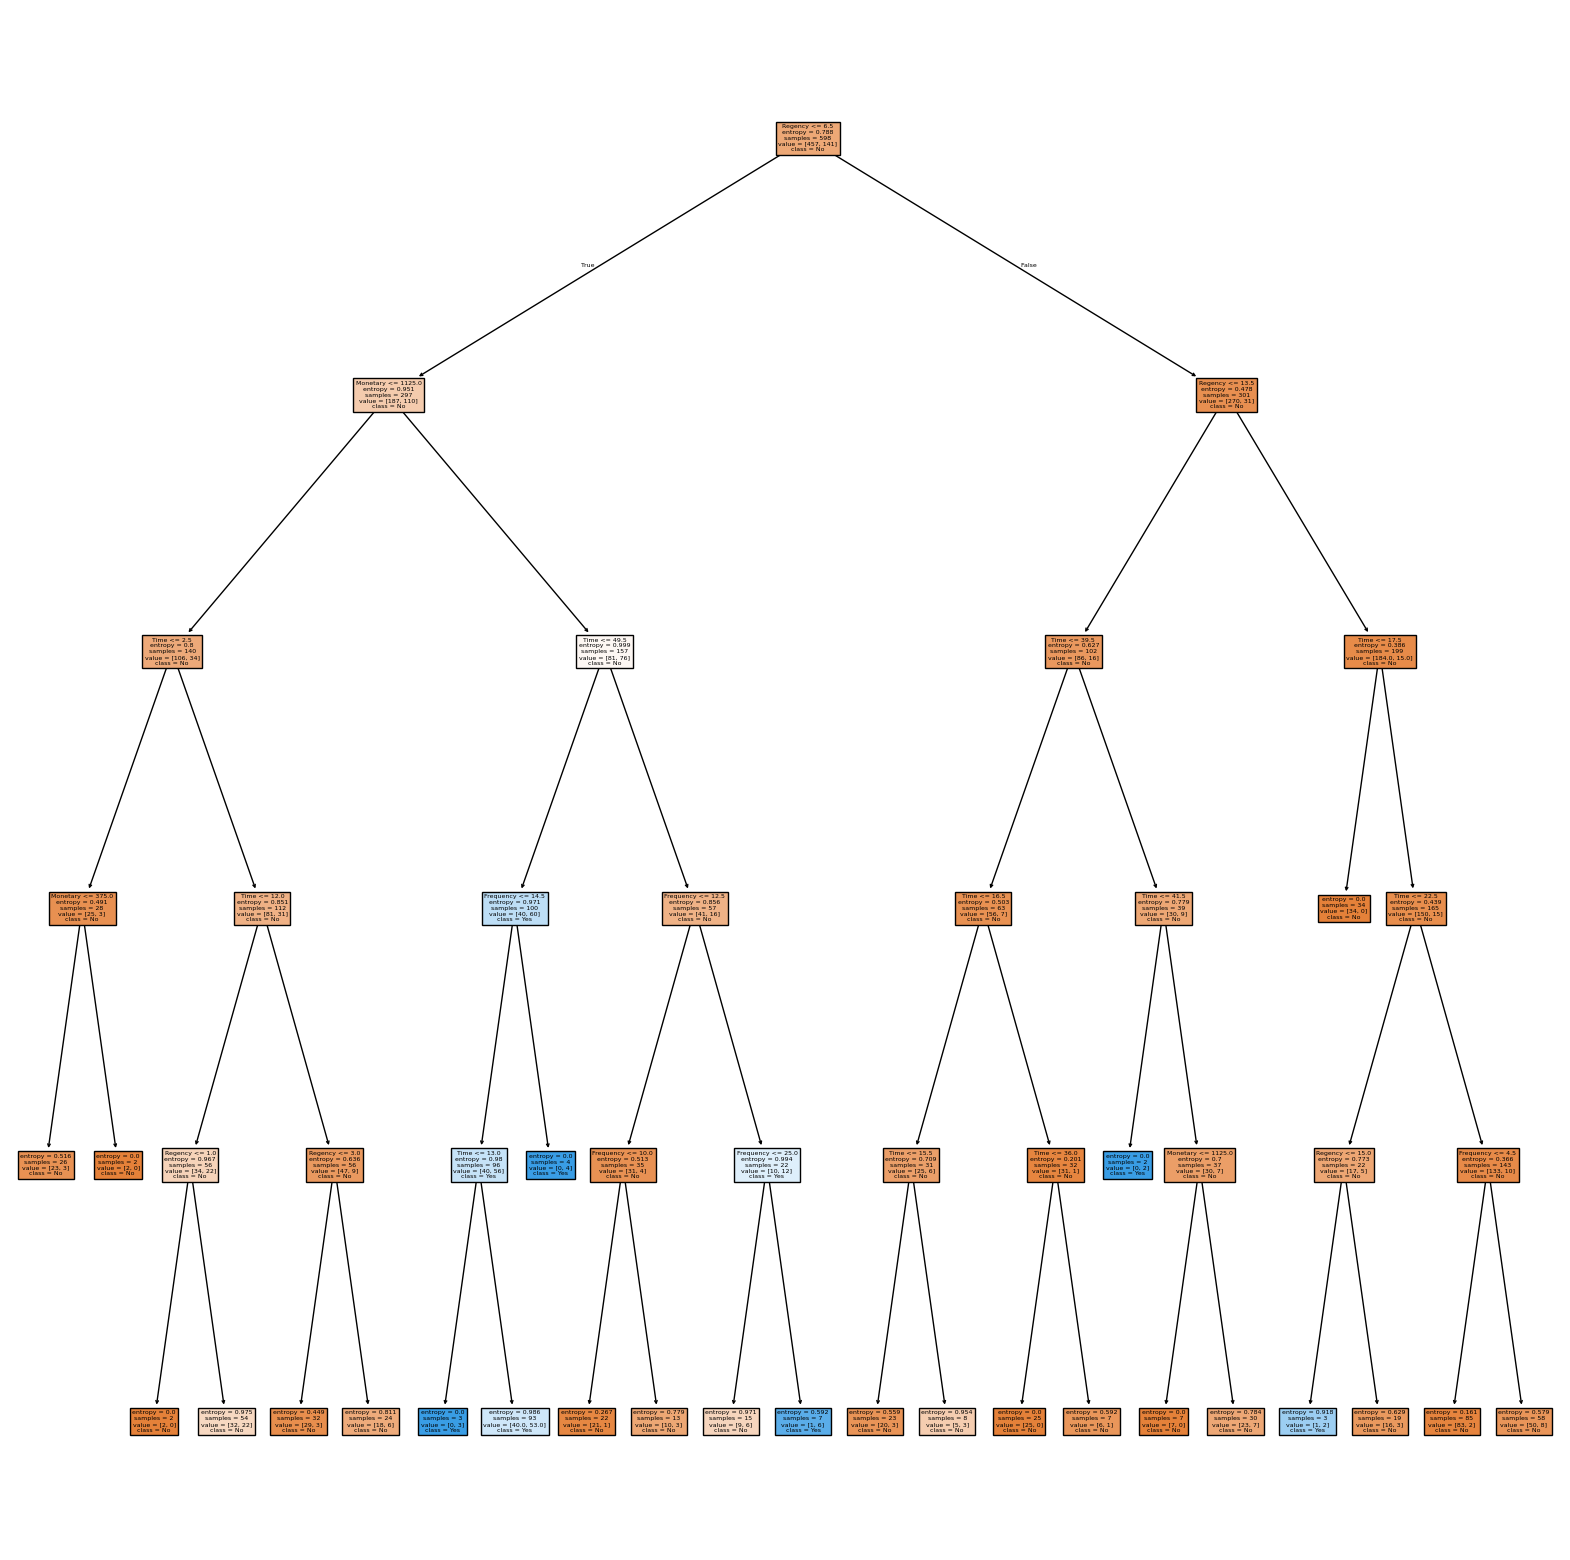

In [31]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

Hyperparameter Tuning

In [29]:
params = [
    {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5},
    { 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10},
    { 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10},
    { 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
]

In [30]:
for param in params:
    clf = DecisionTreeClassifier(criterion=param['criterion'],
                                 max_depth=param['max_depth'],
                                 min_samples_split=param['min_samples_split'],
                                 random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Params: {param}, Accuracy: {accuracy:.2f}")

Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}, Accuracy: 0.78
Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}, Accuracy: 0.72
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}, Accuracy: 0.78
Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}, Accuracy: 0.79
